In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [9]:
data = pd.read_csv("powerconsumption.csv")

In [10]:
data.rename(columns={'PowerConsumption_Zone1':'zone1','PowerConsumption_Zone2':'zone2','PowerConsumption_Zone3':'zone3'},inplace=True)

In [11]:
data['datetime_column'] = pd.to_datetime(data['Datetime'], format='mixed')

data['date'] = data['datetime_column'].dt.date
data['time'] = data['datetime_column'].dt.time

In [12]:
data.drop('Datetime',axis=1,inplace=True)

In [341]:
data.drop('datetime_column',axis=1,inplace=True)

# Forecasting Models --------------------

In [213]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split,learning_curve
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from datetime import datetime
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.callbacks import EarlyStopping
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.tsa.stattools import adfuller

In [214]:
df = pd.read_csv('powerconsumption.csv')

df['Datetime'] = pd.to_datetime(df['Datetime'], format='mixed')

df['Hour'] = df['Datetime'].dt.hour
df['Day'] = df['Datetime'].dt.day
df['Month'] = df['Datetime'].dt.month
df['DayOfWeek'] = df['Datetime'].dt.dayofweek

df = df.drop('Datetime', axis=1)

X = df.drop(['PowerConsumption_Zone1', 'PowerConsumption_Zone2', 'PowerConsumption_Zone3'], axis=1)
y = df[['PowerConsumption_Zone1', 'PowerConsumption_Zone2', 'PowerConsumption_Zone3']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [215]:
df

,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3,Hour,Day,Month,DayOfWeek
0,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386,0,1,1,6
1,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434,0,1,1,6
2,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373,0,1,1,6
3,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711,0,1,1,6
4,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964,0,1,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...
52411,7.010,72.4,0.080,0.040,0.096,31160.45627,26857.31820,14780.31212,23,30,12,5
52412,6.947,72.6,0.082,0.051,0.093,30430.41825,26124.57809,14428.81152,23,30,12,5
52413,6.900,72.8,0.086,0.084,0.074,29590.87452,25277.69254,13806.48259,23,30,12,5
52414,6.758,73.0,0.080,0.066,0.089,28958.17490,24692.23688,13512.60504,23,30,12,5


### Linear Regression --------------

In [216]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

for i, zone in enumerate(['Zone1', 'Zone2', 'Zone3']):
    mae = mean_absolute_error(y_test.iloc[:, i], y_pred[:, i])
    mse = mean_squared_error(y_test.iloc[:, i], y_pred[:, i])
    r2 = r2_score(y_test.iloc[:, i], y_pred[:, i])
    print(f"{zone} - MAE: {mae}, MSE: {mse}, R²: {r2}")

Zone1 - MAE: 3372.028000144995, MSE: 18026145.924616292, R²: 0.6471304934529204
Zone2 - MAE: 2620.3686890607123, MSE: 10988287.544172585, R²: 0.5957647747743846
Zone3 - MAE: 3290.0956589562293, MSE: 17330661.538116124, R²: 0.6058111318027943


### Polynomial Regression ---------

In [217]:
poly = PolynomialFeatures(degree=3)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

model = LinearRegression()
model.fit(X_train_poly, y_train)

y_pred = model.predict(X_test_poly)

for i, zone in enumerate(['Zone1', 'Zone2', 'Zone3']):
    mae = mean_absolute_error(y_test.iloc[:, i], y_pred[:, i])
    mse = mean_squared_error(y_test.iloc[:, i], y_pred[:, i])
    r2 = r2_score(y_test.iloc[:, i], y_pred[:, i])
    print(f"{zone} - MAE: {mae}, MSE: {mse}, R²: {r2}")


Zone1 - MAE: 1804.2956776818874, MSE: 5833564.344438833, R²: 0.8844710321347147
Zone2 - MAE: 1443.022245725548, MSE: 3595063.245574821, R²: 0.8667983588617624
Zone3 - MAE: 1723.9443197692146, MSE: 5205863.618580643, R²: 0.8806118449261467


### Random Forest Regressor Model --------

In [218]:
rf_regressor = RandomForestRegressor(n_estimators=100,max_depth=5,min_samples_split=5,min_samples_leaf=4, random_state=42)

multi_rf_regressor = MultiOutputRegressor(rf_regressor)
multi_rf_regressor.fit(X_train, y_train)

y_pred = multi_rf_regressor.predict(X_test)

mae_zone1 = mean_absolute_error(y_test['PowerConsumption_Zone1'], y_pred[:, 0])
mse_zone1 = mean_squared_error(y_test['PowerConsumption_Zone1'], y_pred[:, 0])
r2_zone1 = r2_score(y_test['PowerConsumption_Zone1'], y_pred[:, 0])

mae_zone2 = mean_absolute_error(y_test['PowerConsumption_Zone2'], y_pred[:, 1])
mse_zone2 = mean_squared_error(y_test['PowerConsumption_Zone2'], y_pred[:, 1])
r2_zone2 = r2_score(y_test['PowerConsumption_Zone2'], y_pred[:, 1])

mae_zone3 = mean_absolute_error(y_test['PowerConsumption_Zone3'], y_pred[:, 2])
mse_zone3 = mean_squared_error(y_test['PowerConsumption_Zone3'], y_pred[:, 2])
r2_zone3 = r2_score(y_test['PowerConsumption_Zone3'], y_pred[:, 2])

print(f"Zone 1 - MAE: {mae_zone1}, MSE: {mse_zone1}, R²: {r2_zone1}")
print(f"Zone 2 - MAE: {mae_zone2}, MSE: {mse_zone2}, R²: {r2_zone2}")
print(f"Zone 3 - MAE: {mae_zone3}, MSE: {mse_zone3}, R²: {r2_zone3}")


Zone 1 - MAE: 1960.7184357005565, MSE: 6834106.973928151, R²: 0.8646561041652797
Zone 2 - MAE: 1625.821129468865, MSE: 4526092.7863830775, R²: 0.8323025365875674
Zone 3 - MAE: 1591.1127220916421, MSE: 4965940.971647156, R²: 0.8861140870662576


### predicting Function -------

In [219]:
def predict_energy_consumption():
    user_input = input("Enter the date and time (dd-mm-yyyy HH:MM): ")
    user_datetime = pd.to_datetime(user_input, format='%d-%m-%Y %H:%M')

    user_hour = user_datetime.hour
    user_day = user_datetime.day
    user_month = user_datetime.month
    user_dayofweek = user_datetime.dayofweek

    user_temp = float(input("Enter temperature: "))
    user_humidity = float(input("Enter humidity: "))
    user_wind_speed = float(input("Enter wind speed: "))
    user_gen_diff_flows = float(input("Enter general diffuse flows: "))
    user_diff_flows = float(input("Enter diffuse flows: "))

    user_data = pd.DataFrame({
        'Temperature': [user_temp],
        'Humidity': [user_humidity],
        'WindSpeed': [user_wind_speed],
        'GeneralDiffuseFlows': [user_gen_diff_flows],
        'DiffuseFlows': [user_diff_flows],
        'Hour': [user_hour],
        'Day': [user_day],
        'Month': [user_month],
        'DayOfWeek': [user_dayofweek]
    })

    user_data_scaled = scaler.transform(user_data)

    user_pred = multi_rf_regressor.predict(user_data_scaled)

    print(f"Predicted Energy Consumption for Zone 1: {user_pred[0][0]:.2f}")
    print(f"Predicted Energy Consumption for Zone 2: {user_pred[0][1]:.2f}")
    print(f"Predicted Energy Consumption for Zone 3: {user_pred[0][2]:.2f}")

predict_energy_consumption()

Enter the date and time (dd-mm-yyyy HH:MM): 12-05-2002 11:00
Enter temperature: 40
Enter humidity: 25
Enter wind speed: 10
Enter general diffuse flows: 0.03
Enter diffuse flows: 0.05
Predicted Energy Consumption for Zone 1: 28006.57
Predicted Energy Consumption for Zone 2: 16654.50
Predicted Energy Consumption for Zone 3: 16159.30


C:\Users\infor\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names

C:\Users\infor\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names

C:\Users\infor\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names



In [220]:
df.sample()

,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3,Hour,Day,Month,DayOfWeek
31439,26.33,64.42,4.904,104.4,82.1,29637.46948,22653.0095,19314.35737,7,7,8,0


### Checking for Overfitting --------

In [221]:
y_train_pred = multi_rf_regressor.predict(X_train)
y_test_pred = multi_rf_regressor.predict(X_test)

mae_train = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"Training Set - MAE: {mae_train}, MSE: {mse_train}, R²: {r2_train}")
print(f"Test Set - MAE: {mae_test}, MSE: {mse_test}, R²: {r2_test}")

if r2_train > r2_test:
    print("The model may be overfitting since the training R² is higher than the test R².")
else:
    print("The model does not seem to be overfitting.")

Training Set - MAE: 1729.6172355858587, MSE: 5495429.05661971, R²: 0.8604940707611627
Test Set - MAE: 1725.884095753688, MSE: 5442046.910652795, R²: 0.8610242426063683
The model does not seem to be overfitting.


### Learning Curve -------

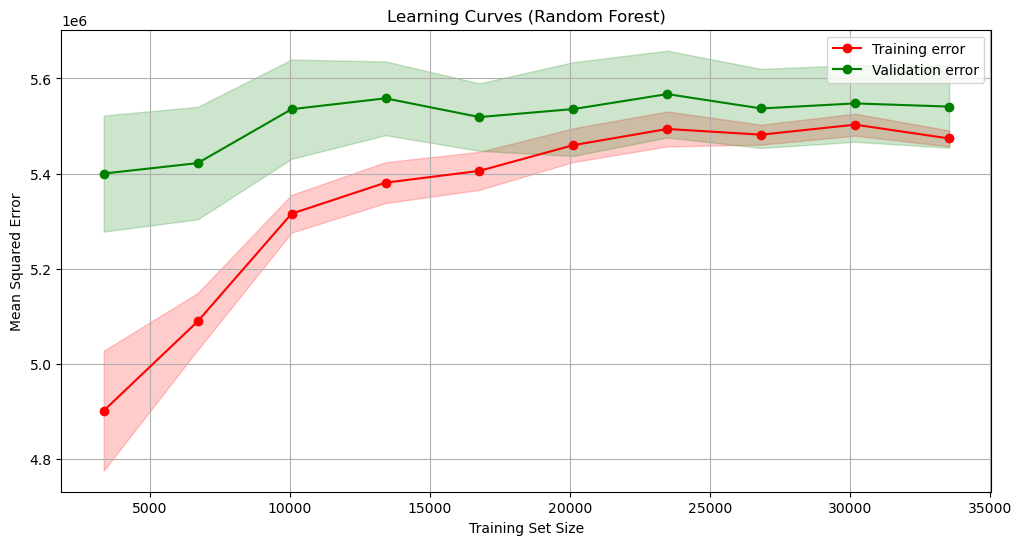

In [222]:
train_sizes, train_scores, test_scores = learning_curve(
    estimator=multi_rf_regressor,
    X=X_train,
    y=y_train,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

train_scores_mean = -np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(12, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training error')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Validation error')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.2, color='r')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.2, color='g')
plt.xlabel('Training Set Size')
plt.ylabel('Mean Squared Error')
plt.title('Learning Curves (Random Forest)')
plt.legend(loc='best')
plt.grid(True)
plt.show()

### Ridge Regression -------

In [223]:
ridge_regressor = Ridge(alpha=1.0, random_state=42)

multi_ridge_regressor = MultiOutputRegressor(ridge_regressor)
multi_ridge_regressor.fit(X_train, y_train)

y_pred = multi_ridge_regressor.predict(X_test)

mae_zone1 = mean_absolute_error(y_test['PowerConsumption_Zone1'], y_pred[:, 0])
mse_zone1 = mean_squared_error(y_test['PowerConsumption_Zone1'], y_pred[:, 0])
r2_zone1 = r2_score(y_test['PowerConsumption_Zone1'], y_pred[:, 0])

mae_zone2 = mean_absolute_error(y_test['PowerConsumption_Zone2'], y_pred[:, 1])
mse_zone2 = mean_squared_error(y_test['PowerConsumption_Zone2'], y_pred[:, 1])
r2_zone2 = r2_score(y_test['PowerConsumption_Zone2'], y_pred[:, 1])

mae_zone3 = mean_absolute_error(y_test['PowerConsumption_Zone3'], y_pred[:, 2])
mse_zone3 = mean_squared_error(y_test['PowerConsumption_Zone3'], y_pred[:, 2])
r2_zone3 = r2_score(y_test['PowerConsumption_Zone3'], y_pred[:, 2])

print(f"Zone 1 - MAE: {mae_zone1}, MSE: {mse_zone1}, R²: {r2_zone1}")
print(f"Zone 2 - MAE: {mae_zone2}, MSE: {mse_zone2}, R²: {r2_zone2}")
print(f"Zone 3 - MAE: {mae_zone3}, MSE: {mse_zone3}, R²: {r2_zone3}")


Zone 1 - MAE: 3345.1087214007835, MSE: 17752317.80023437, R²: 0.6484298738158687
Zone 2 - MAE: 2621.4608362725753, MSE: 10941366.319183407, R²: 0.5946085366359555
Zone 3 - MAE: 3281.7872964525477, MSE: 17209627.709006418, R²: 0.6053247160849895


In [224]:
# LSTM , SVR, SARIMA,

## Decision Trees Regressor --------------------------------------

In [225]:
X=df.iloc[:,0:5]
y=df.iloc[:,5]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rt = DecisionTreeRegressor(criterion='poisson',splitter='best',max_depth=10)
rt.fit(X_train,y_train)
y_pred = rt.predict(X_test)
r2= r2_score(y_test,y_pred)
print('Zone 1 -> r2_score = ',r2)
print("\n")
print('Feature importances ------------')
for importance,name in sorted(zip(rt.feature_importances_,X_train.columns),reverse=True):
    print(name,importance)

print('\n\n')
y1=df.iloc[:,6]
X_train, X_test, y1_train, y1_test = train_test_split(X, y1, test_size=0.2, random_state=42)
rt1 = DecisionTreeRegressor(criterion='poisson',splitter='best',max_depth=13)
rt1.fit(X_train,y1_train)
y1_pred = rt1.predict(X_test)
r21= r2_score(y1_test,y1_pred)
r21
print('Zone2 -> r2_score = ',r21)
print("\n")
print('Feature importances ------------')
for importance,name in sorted(zip(rt1.feature_importances_,X_train.columns),reverse=True):
    print(name,importance)

print('\n\n')
y3=df.iloc[:,7]
X_train, X_test, y3_train, y3_test = train_test_split(X, y3, test_size=0.2, random_state=42)
rt2 = DecisionTreeRegressor(criterion='squared_error',splitter='best',max_depth=10)
rt2.fit(X_train,y3_train)
y3_pred = rt2.predict(X_test)
r23= r2_score(y3_test,y3_pred)
print('Zone3 -> r2_score = ',r23)
print("\n")
print('Feature importances ------------')
for importance,name in sorted(zip(rt2.feature_importances_,X_train.columns),reverse=True):
    print(name,importance)

Zone 1 -> r2_score =  0.38290061440973866


Feature importances ------------
Temperature 0.5417227063043925
Humidity 0.16031310287310055
WindSpeed 0.12122024983330185
GeneralDiffuseFlows 0.1108597922881497
DiffuseFlows 0.06588414870105538



Zone2 -> r2_score =  0.37047325445588564


Feature importances ------------
Temperature 0.41208739871474437
Humidity 0.23030887298380923
WindSpeed 0.13080048558456112
GeneralDiffuseFlows 0.12329391673690217
DiffuseFlows 0.103509325979983



Zone3 -> r2_score =  0.5628234655823128


Feature importances ------------
Temperature 0.5778041776075862
GeneralDiffuseFlows 0.15625321982946636
WindSpeed 0.1176277700066813
Humidity 0.11733547739873462
DiffuseFlows 0.03097935515753148


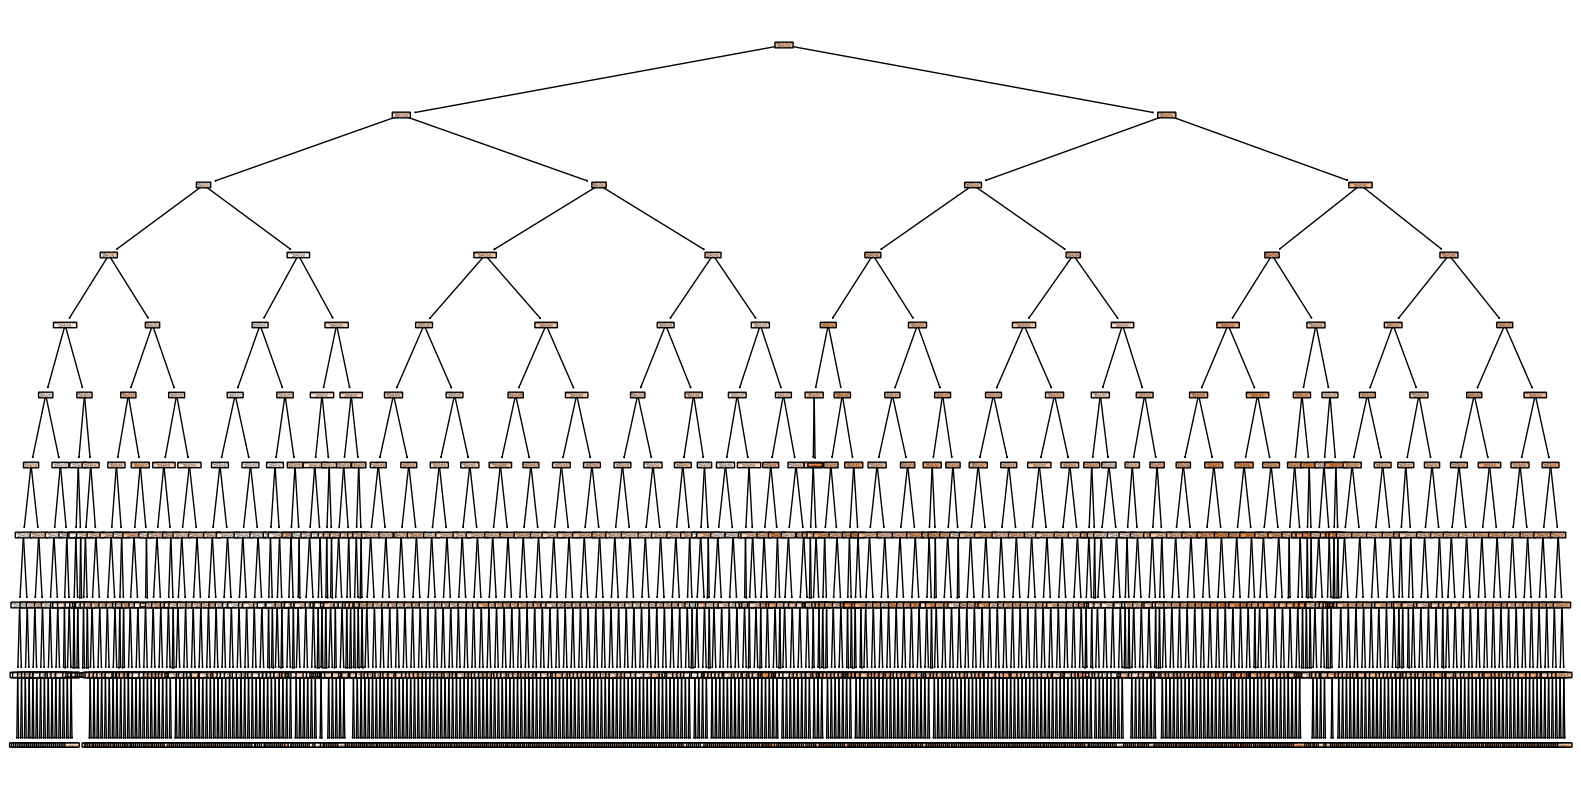

In [226]:
feature_names = X_train.columns.tolist()
plt.figure(figsize=(20,10))
plot_tree(rt, feature_names=feature_names, filled=True, rounded=True)
plt.show()

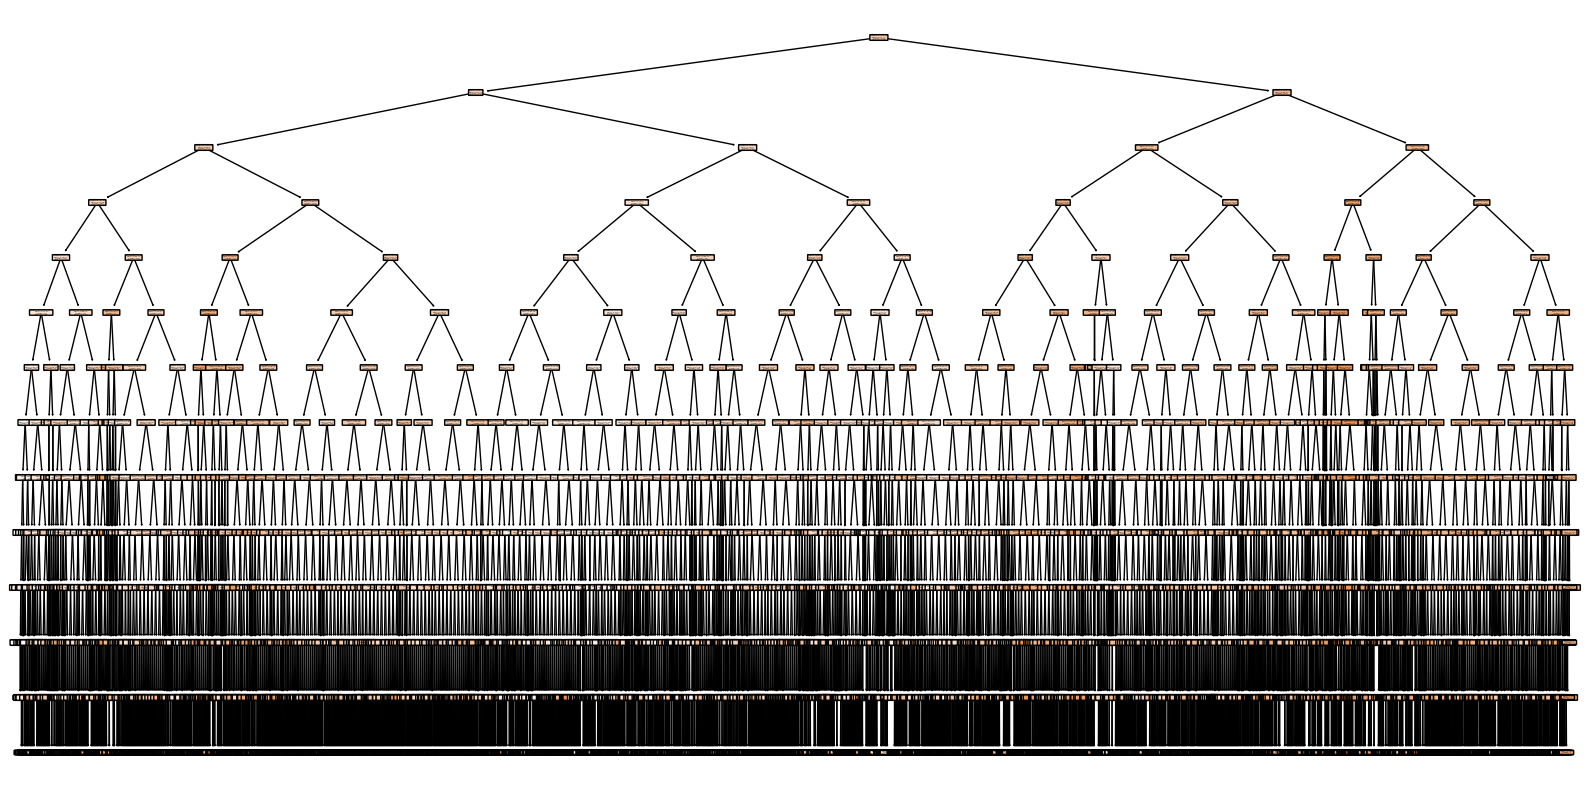

In [227]:
feature_names = X_train.columns.tolist()
plt.figure(figsize=(20,10))
plot_tree(rt1, feature_names=feature_names, filled=True, rounded=True)
plt.show()

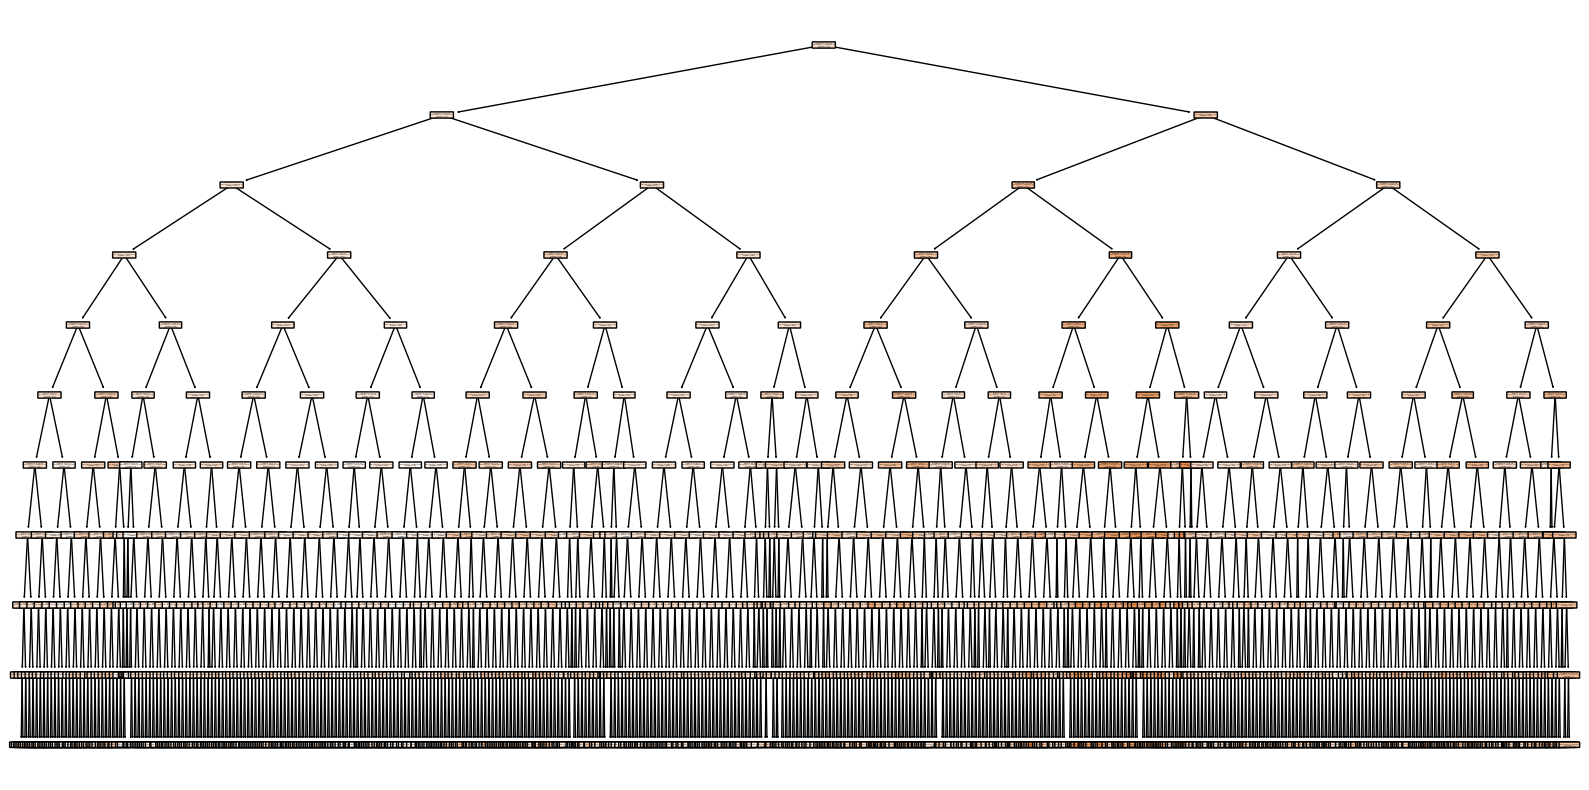

In [228]:
feature_names = X_train.columns.tolist()
plt.figure(figsize=(20,10))
plot_tree(rt2, feature_names=feature_names, filled=True, rounded=True)
plt.show()


In [229]:
# from dtreeviz.trees import *
# from dtreeviz import dtreeviz
# import graphviz.backend as be
# from IPython.display import Image,display_svg,SVG
# feature_names = X_train.columns.tolist()

# viz = dtreeviz(rt2,
#                 X_train, 
#                 y_train, 
#                 target_name='Power Consumption Zone 3', 
#                 feature_names=feature_names,  
#                 title='Decision Tree for Zone 3')

# viz.view()

## Zone1

In [235]:
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)

target_column = 'zone1'
data = data[[target_column]]

scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

time_step = 10
X, y = create_dataset(data_scaled, time_step)

X = X.reshape(X.shape[0], X.shape[1], 1)

In [236]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')


C:\Users\infor\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [237]:
model.fit(X, y, epochs=100, batch_size=32)

Epoch 1/100
1638/1638 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - loss: 0.0098
Epoch 2/100
1638/1638 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - loss: 0.0014
Epoch 3/100
1638/1638 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - loss: 7.4895e-04
Epoch 4/100
1638/1638 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - loss: 5.0355e-04
Epoch 5/100
1638/1638 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - loss: 4.5547e-04
Epoch 6/100
1638/1638 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - loss: 4.4212e-04
Epoch 7/100
1638/1638 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - loss: 4.2368e-04
Epoch 8/100
1638/1638 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - loss: 4.1001e-04
Epoch 9/100
1638/1638 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - loss: 4.0789e-04
Epoch 10/100
1638/1638 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - loss: 4.0505e-04
Epoch 11/100
1638/1638 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - loss: 3.8725e-04
Epoch 12/100
1638/1638 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - loss: 3.9140e-04
Epoch 13/100
1638/1638 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - loss: 3.8786e-04
Epoch 14/100
1638/1638 ━━━━━

In [238]:
train_size = int(len(data) * 0.8)
train_data, test_data = data_scaled[0:train_size], data_scaled[train_size:len(data)]

X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

rmse = np.sqrt(np.mean(((predictions - scaler.inverse_transform(y_test.reshape(-1, 1))) ** 2)))
print(f'Root Mean Squared Error: {rmse}')


328/328 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
Root Mean Squared Error: 402.40928500137215


In [239]:
y_test_inverse = scaler.inverse_transform(y_test.reshape(-1, 1))  # Inverse transform y_test
r2 = r2_score(y_test_inverse, predictions)
print(f'R-squared: {r2}')

R-squared: 0.995744768229377


Epoch 1/100


C:\Users\infor\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



1311/1311 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - loss: 0.0137 - val_loss: 8.0460e-04
Epoch 2/100
1311/1311 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - loss: 0.0019 - val_loss: 4.1030e-04
Epoch 3/100
1311/1311 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - loss: 0.0011 - val_loss: 4.1200e-04
Epoch 4/100
1311/1311 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - loss: 7.4917e-04 - val_loss: 2.0489e-04
Epoch 5/100
1311/1311 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - loss: 5.6792e-04 - val_loss: 2.7399e-04
Epoch 6/100
1311/1311 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - loss: 5.0733e-04 - val_loss: 1.7466e-04
Epoch 7/100
1311/1311 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - loss: 4.4784e-04 - val_loss: 1.2507e-04
Epoch 8/100
1311/1311 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - loss: 4.3719e-04 - val_loss: 1.3229e-04
Epoch 9/100
1311/1311 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - loss: 4.3053e-04 - val_loss: 2.3840e-04
Epoch 10/100
1311/1311 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - loss: 4.3994e-04 - val_loss: 1.1167e-04
Epoch 11/100
1311/1311 ━━━━━━━━━━

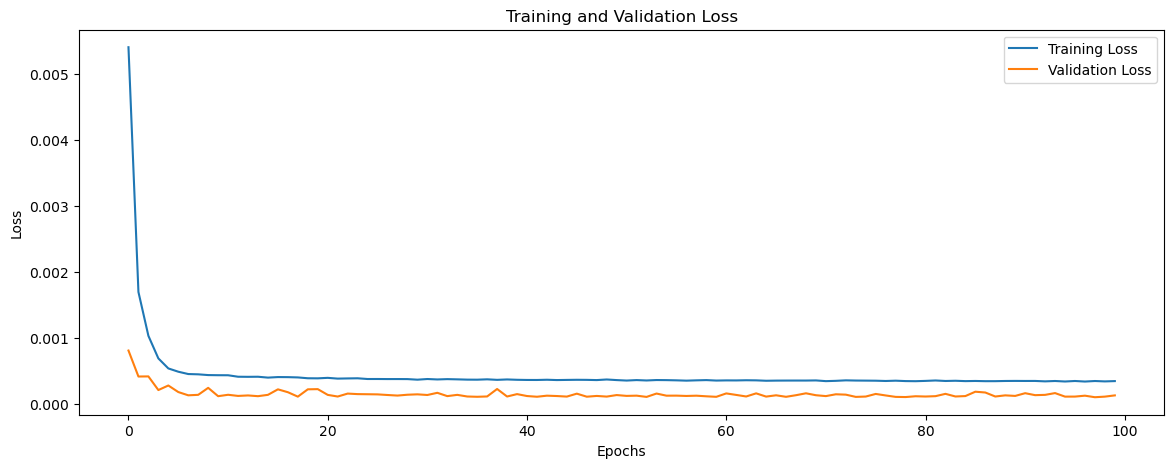

In [240]:
train_size = int(len(data) * 0.8)
train_data, test_data = data_scaled[0:train_size], data_scaled[train_size:len(data)]

X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(50))
model.add(Dropout(0.2))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

history = model.fit(X_train, y_train, epochs=100, batch_size=32, 
                    validation_data=(X_test, y_test), verbose=1)

plt.figure(figsize=(14, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [242]:
y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
print("R² score on test data:", r2)

328/328 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
R² score on test data: 0.9921895793375365


Yes, based on the graph you provided, it appears that the model is not overfitting.

Here are the key observations from the graph:

Decreasing Training and Validation Loss: Both the training and validation loss are steadily decreasing over the epochs. This indicates that the model is learning from the training data and generalizing well to the validation set.


Converging Training and Validation Loss: The gap between the training and validation loss remains relatively small and consistent throughout the training process. This suggests that the model is not overfitting, as there's no significant difference in performance between the training and validation sets.
A well-fit model is one that can generalize well to unseen data. In this case, the model seems to be achieving this by effectively learning the underlying patterns in the data without overfitting.

While it's always a good practice to experiment with different hyperparameters and techniques to further improve the model's performance, the current graph suggests that the model is on a good track.

In [ ]:
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)

target_column = 'zone2'
data = data[[target_column]]

scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

time_step = 10
X, y = create_dataset(data_scaled, time_step)

X = X.reshape(X.shape[0], X.shape[1], 1)


model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
model.fit(X, y, epochs=100, batch_size=32)

In [ ]:
train_size = int(len(data) * 0.8)
train_data, test_data = data_scaled[0:train_size], data_scaled[train_size:len(data)]

X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)  

rmse = np.sqrt(np.mean(((predictions - scaler.inverse_transform(y_test.reshape(-1, 1))) ** 2)))
print(f'Root Mean Squared Error: {rmse}')

y_test_inverse = scaler.inverse_transform(y_test.reshape(-1, 1)) 
r2 = r2_score(y_test_inverse, predictions)
print(f'R-squared: {r2}')

Epoch 1/50


C:\Users\infor\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



1311/1311 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - loss: 0.0118 - val_loss: 6.2511e-04
Epoch 2/50
1311/1311 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - loss: 0.0018 - val_loss: 3.9844e-04
Epoch 3/50
1311/1311 ━━━━━━━━━━━━━━━━━━━━ 16s 12ms/step - loss: 0.0011 - val_loss: 3.3542e-04
Epoch 4/50
1311/1311 ━━━━━━━━━━━━━━━━━━━━ 15s 11ms/step - loss: 7.2222e-04 - val_loss: 1.6748e-04
Epoch 5/50
1311/1311 ━━━━━━━━━━━━━━━━━━━━ 15s 11ms/step - loss: 5.3710e-04 - val_loss: 1.6004e-04
Epoch 6/50
1311/1311 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - loss: 4.9260e-04 - val_loss: 1.2498e-04
Epoch 7/50
1311/1311 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - loss: 4.6833e-04 - val_loss: 1.1423e-04
Epoch 8/50
1311/1311 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - loss: 4.5386e-04 - val_loss: 1.3589e-04
Epoch 9/50
1311/1311 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - loss: 4.3331e-04 - val_loss: 1.6570e-04
Epoch 10/50
1311/1311 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - loss: 4.4071e-04 - val_loss: 2.6700e-04
Epoch 11/50
1311/1311 ━━━━━━━━━━━━━━━━━━━━

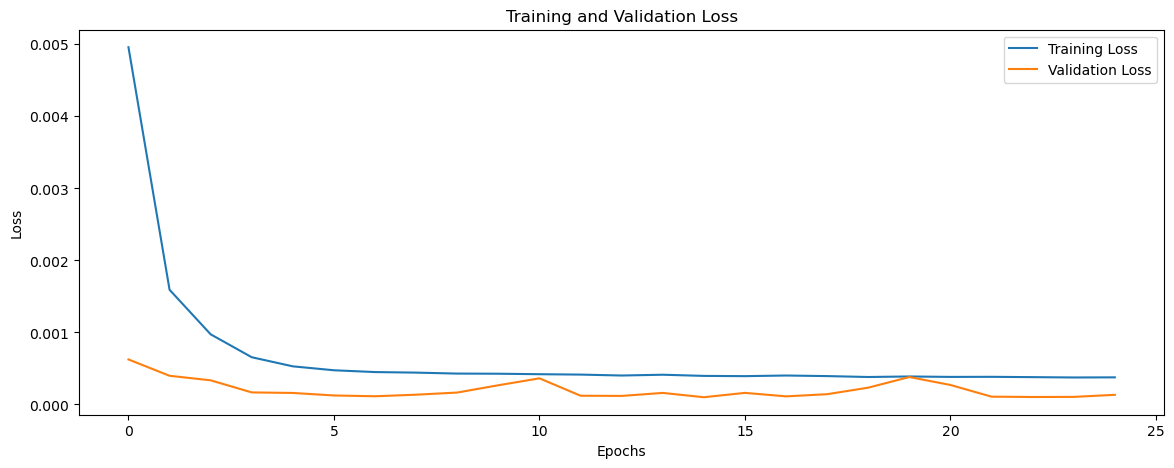

In [243]:
train_size = int(len(data) * 0.8)
train_data, test_data = data_scaled[0:train_size], data_scaled[train_size:len(data)]

X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(50))
model.add(Dropout(0.2))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

early_stopping = EarlyStopping(monitor='val_loss', patience=10)
history = model.fit(X_train, y_train, epochs=50, batch_size=32, 
                    validation_data=(X_test, y_test), callbacks=[early_stopping], verbose=1)

plt.figure(figsize=(14, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [244]:
y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
print("R² score on test data:", r2)

328/328 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
R² score on test data: 0.9948348039301338


In [ ]:
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)

target_column = 'zone3'
data = data[[target_column]]

scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

time_step = 10
X, y = create_dataset(data_scaled, time_step)

X = X.reshape(X.shape[0], X.shape[1], 1)


model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
model.fit(X, y, epochs=50, batch_size=32)

In [ ]:
train_size = int(len(data) * 0.8)
train_data, test_data = data_scaled[0:train_size], data_scaled[train_size:len(data)]

X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

rmse = np.sqrt(np.mean(((predictions - scaler.inverse_transform(y_test.reshape(-1, 1))) ** 2)))
print(f'Root Mean Squared Error: {rmse}')

y_test_inverse = scaler.inverse_transform(y_test.reshape(-1, 1))
r2 = r2_score(y_test_inverse, predictions)
print(f'R-squared: {r2}')

Epoch 1/50


C:\Users\infor\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



1311/1311 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - loss: 0.0120 - val_loss: 6.1292e-04
Epoch 2/50
1311/1311 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - loss: 0.0018 - val_loss: 4.8903e-04
Epoch 3/50
1311/1311 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - loss: 0.0011 - val_loss: 2.4000e-04
Epoch 4/50
1311/1311 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - loss: 7.1728e-04 - val_loss: 1.6122e-04
Epoch 5/50
1311/1311 ━━━━━━━━━━━━━━━━━━━━ 15s 11ms/step - loss: 5.4429e-04 - val_loss: 1.5027e-04
Epoch 6/50
1311/1311 ━━━━━━━━━━━━━━━━━━━━ 16s 12ms/step - loss: 4.7046e-04 - val_loss: 1.1424e-04
Epoch 7/50
1311/1311 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - loss: 4.4855e-04 - val_loss: 1.2757e-04
Epoch 8/50
1311/1311 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - loss: 4.4019e-04 - val_loss: 1.2777e-04
Epoch 9/50
1311/1311 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - loss: 4.4152e-04 - val_loss: 1.1347e-04
Epoch 10/50
1311/1311 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - loss: 4.3245e-04 - val_loss: 1.7256e-04
Epoch 11/50
1311/1311 ━━━━━━━━━━━━━━━━━━━━

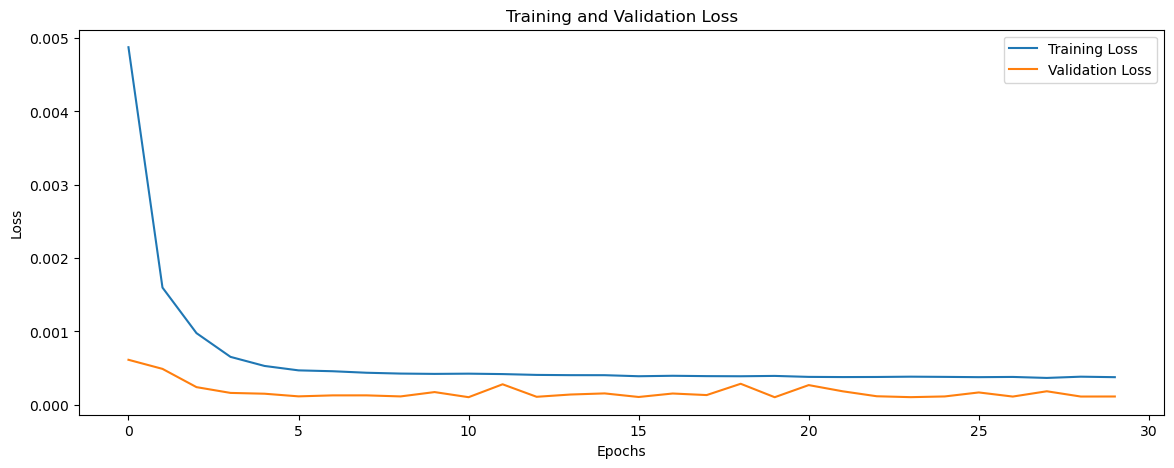

In [245]:
train_size = int(len(data) * 0.8)
train_data, test_data = data_scaled[0:train_size], data_scaled[train_size:len(data)]

X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(50))
model.add(Dropout(0.2))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

early_stopping = EarlyStopping(monitor='val_loss', patience=10)
history = model.fit(X_train, y_train, epochs=50, batch_size=32, 
                    validation_data=(X_test, y_test), callbacks=[early_stopping], verbose=1)

plt.figure(figsize=(14, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [246]:
y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
print("R² score on test data:", r2)

328/328 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step
R² score on test data: 0.9956687376931147


# Hybrid Model - (Polynomial Regression and Random Forest Regression)

## Zone1

Root Mean Squared Error (RMSE): 2127.803149113626
R2 Score: 0.9103356518682484


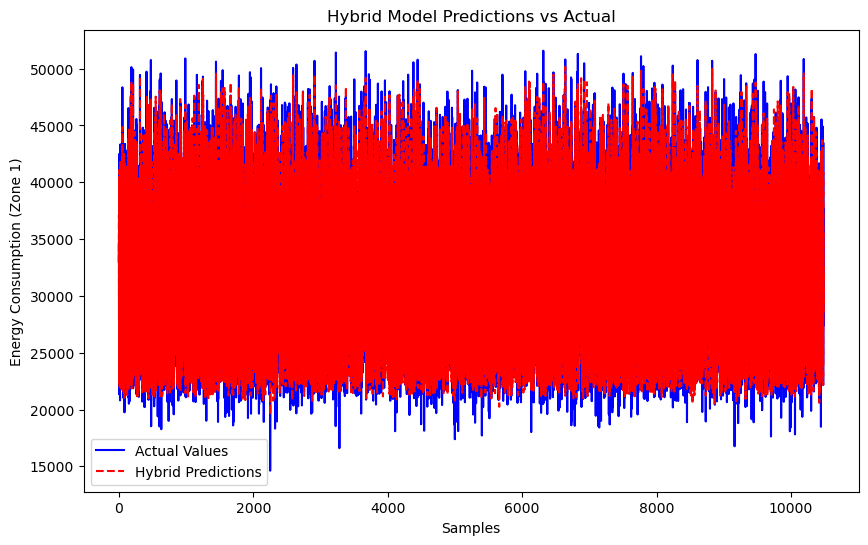

In [278]:
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)

data['time'] = pd.to_datetime(data['time'], format='%H:%M:%S').dt.hour * 3600 + pd.to_datetime(data['time'], format='%H:%M:%S').dt.minute * 60

features = ['Temperature', 'Humidity', 'WindSpeed', 'DiffuseFlows', 'GeneralDiffuseFlows', 'time']
X = data[features].values
y = data['zone1'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

degree = 3 
poly = PolynomialFeatures(degree=degree)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

poly_model = LinearRegression()
poly_model.fit(X_poly_train, y_train)
poly_predictions = poly_model.predict(X_poly_test)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)


alpha = 0.5  
beta = 0.5  

hybrid_predictions = (alpha * poly_predictions) + (beta * rf_predictions)

rmse = np.sqrt(mean_squared_error(y_test, hybrid_predictions))
r2 = r2_score(y_test, hybrid_predictions)

print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R2 Score: {r2}')

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual Values', color='blue')
plt.plot(hybrid_predictions, label='Hybrid Predictions', color='red', linestyle='--')
plt.title('Hybrid Model Predictions vs Actual')
plt.xlabel('Samples')
plt.ylabel('Energy Consumption (Zone 1)')
plt.legend()
plt.show()


## Zone2

Root Mean Squared Error (RMSE): 2059.8600502746604
R2 Score: 0.8427906144565209


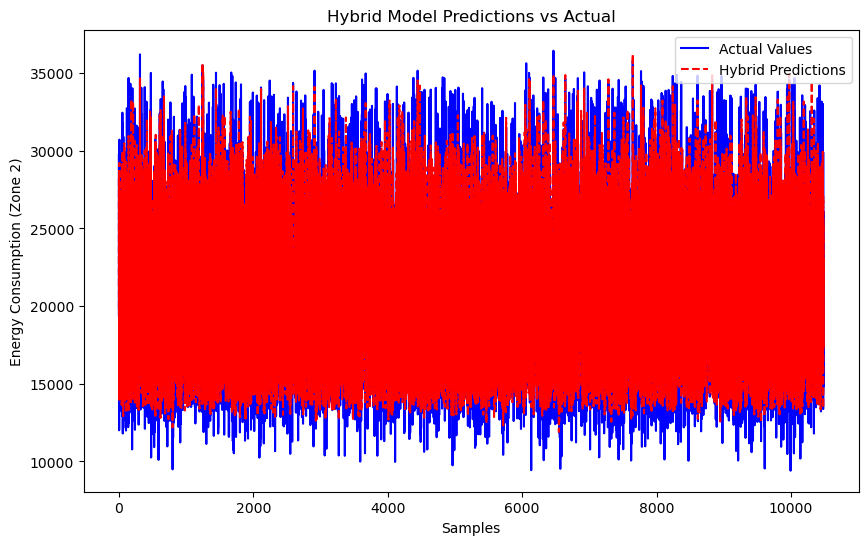

In [332]:
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)

data['time'] = pd.to_datetime(data['time'], format='%H:%M:%S').dt.hour * 3600 + pd.to_datetime(data['time'], format='%H:%M:%S').dt.minute * 60

features = ['Temperature', 'Humidity', 'WindSpeed', 'DiffuseFlows', 'GeneralDiffuseFlows', 'time']
X = data[features].values
y = data['zone2'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

degree = 3 
poly = PolynomialFeatures(degree=degree)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

poly_model = LinearRegression()
poly_model.fit(X_poly_train, y_train)
poly_predictions = poly_model.predict(X_poly_test)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

alpha = 0.5  
beta = 0.5 

hybrid_predictions = (alpha * poly_predictions) + (beta * rf_predictions)

rmse = np.sqrt(mean_squared_error(y_test, hybrid_predictions))
r2 = r2_score(y_test, hybrid_predictions)

print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R2 Score: {r2}')

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual Values', color='blue')
plt.plot(hybrid_predictions, label='Hybrid Predictions', color='red', linestyle='--')
plt.title('Hybrid Model Predictions vs Actual')
plt.xlabel('Samples')
plt.ylabel('Energy Consumption (Zone 2)')
plt.legend()
plt.show()


## Zone3

Root Mean Squared Error (RMSE): 2647.0580709365972
R2 Score: 0.8393075795421697


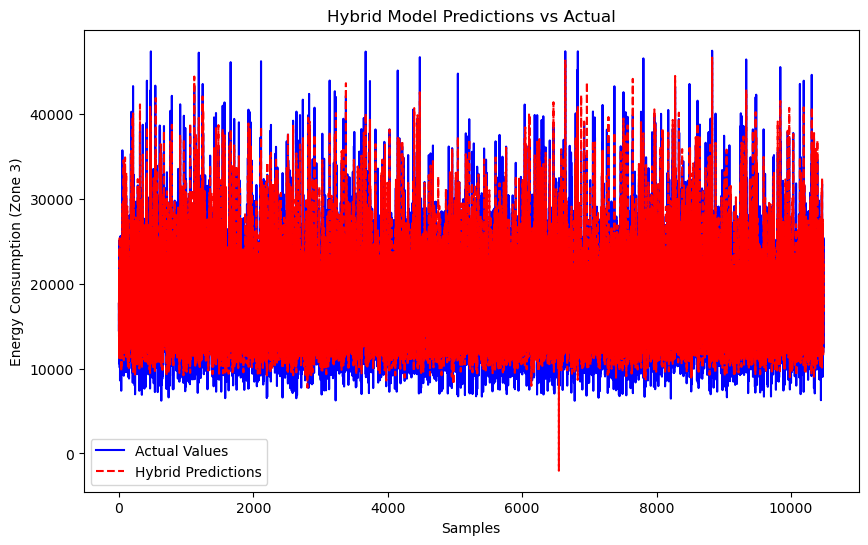

In [352]:
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)

data['time'] = pd.to_datetime(data['time'], format='%H:%M:%S').dt.hour * 3600 + pd.to_datetime(data['time'], format='%H:%M:%S').dt.minute * 60

features = ['Temperature', 'Humidity', 'WindSpeed', 'DiffuseFlows', 'GeneralDiffuseFlows', 'time']
X = data[features].values
y = data['zone3'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

degree = 3
poly = PolynomialFeatures(degree=degree)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

poly_model = LinearRegression()
poly_model.fit(X_poly_train, y_train)
poly_predictions = poly_model.predict(X_poly_test)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)


alpha = 0.5
beta = 0.5

hybrid_predictions = (alpha * poly_predictions) + (beta * rf_predictions)

rmse = np.sqrt(mean_squared_error(y_test, hybrid_predictions))
r2 = r2_score(y_test, hybrid_predictions)

print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R2 Score: {r2}')

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual Values', color='blue')
plt.plot(hybrid_predictions, label='Hybrid Predictions', color='red', linestyle='--')
plt.title('Hybrid Model Predictions vs Actual')
plt.xlabel('Samples')
plt.ylabel('Energy Consumption (Zone 3)')
plt.legend()
plt.show()


## Hybrid - (Random Forest Regression and LSTM)

C:\Users\infor\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
656/656 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1097416064.0000
Epoch 2/10
656/656 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1094760064.0000
Epoch 3/10
656/656 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1089601920.0000
Epoch 4/10
656/656 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1083060736.0000
Epoch 5/10
656/656 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1088457600.0000
Epoch 6/10
656/656 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1087553280.0000
Epoch 7/10
656/656 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1084583424.0000
Epoch 8/10
656/656 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1077378688.0000
Epoch 9/10
656/656 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1080877568.0000
Epoch 10/10
656/656 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1077094272.0000
1311/1311 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
328/328 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Train MSE (Hybrid Model): 274478646.14304656
Test MSE (Hybrid Model): 288530706.73283887


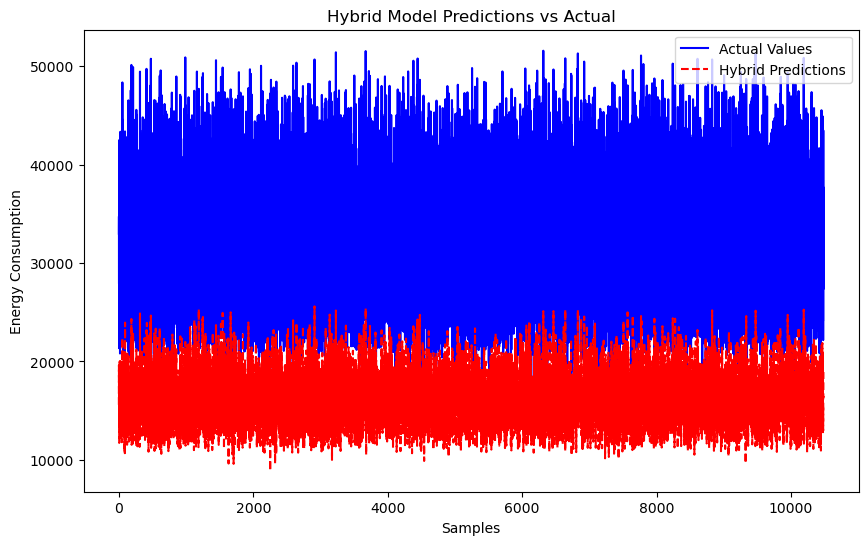

In [172]:
X = data[['Temperature', 'Humidity', 'WindSpeed', 'GeneralDiffuseFlows', 'DiffuseFlows']]  # Example features
y = data['zone1']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

rf_pred_train = rf.predict(X_train)
rf_pred_test = rf.predict(X_test)

scaler = MinMaxScaler(feature_range=(0, 1))
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_lstm = np.reshape(X_train_scaled, (X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_lstm = np.reshape(X_test_scaled, (X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

lstm_model = Sequential()
lstm_model.add(LSTM(50, return_sequences=False, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
lstm_model.add(Dense(1))

lstm_model.compile(optimizer='adam', loss='mean_squared_error')

lstm_model.fit(X_train_lstm, y_train, epochs=10, batch_size=64, verbose=1)

lstm_pred_train = lstm_model.predict(X_train_lstm)
lstm_pred_test = lstm_model.predict(X_test_lstm)

lstm_pred_train = lstm_pred_train.reshape(-1)
lstm_pred_test = lstm_pred_test.reshape(-1)

hybrid_pred_train = 0.5 * rf_pred_train + 0.5 * lstm_pred_train
hybrid_pred_test = 0.5 * rf_pred_test + 0.5 * lstm_pred_test

mse_train = mean_squared_error(y_train, hybrid_pred_train)
mse_test = mean_squared_error(y_test, hybrid_pred_test)

print(f"Train MSE (Hybrid Model): {mse_train}")
print(f"Test MSE (Hybrid Model): {mse_test}")

import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(y_test.values, label='Actual Values', color='blue')
plt.plot(hybrid_pred_test, label='Hybrid Predictions', color='red', linestyle='--')
plt.title('Hybrid Model Predictions vs Actual')
plt.xlabel('Samples')
plt.ylabel('Energy Consumption')
plt.legend()
plt.show()
